# User Guide

This section will give a short overview of the package.

This package was developed during a master thesis. It is primarily tailored to address the specific challenges and requirements encountered in this study, as well as being compatible with other software utilized in this thesis. Nonetheless, certain functions within the package can be applied to other problem domains as well, e.g. the stepwise grouping algorithm.

## Importing the Package

The package can be imported as shown below. To try some functionalities ```numpy``` is loaded as well as ```matplotlib``` for visualization. The occuring warning depends on your computer and whether you want to use and have access to a GPU. However, in most cases it can be ignored.

In [1]:
import searchep as sep
import numpy as np
import matplotlib.pyplot as plt

2023-07-26 16:42:07.297784: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Using the Stepwise Grouping Algorithm

Imagine a Hamiltonian with several eigenvalues and eigenvectors for a diagonalization. If this Hamiltonian depends on an angle, for example, it might be useful to group the eigenvalues and eigenvectors for each angle to trace their progression as a function of the angle. The stepwise grouping algorithm provides a straightforward way to do this. It can be used for every dataset which is obtained step by step.

To visualize its behavior, two examples are constructed. The first one consists of four straight lines and the second one of 4 ellipses.

[[[ 1  1]
  [ 1 -1]
  [-1 -1]
  [-1  1]]

 [[ 2  2]
  [ 2 -2]
  [-2 -2]
  [-2  2]]

 [[ 3  3]
  [ 3 -3]
  [-3 -3]
  [-3  3]]

 [[ 4  4]
  [ 4 -4]
  [-4 -4]
  [-4  4]]]


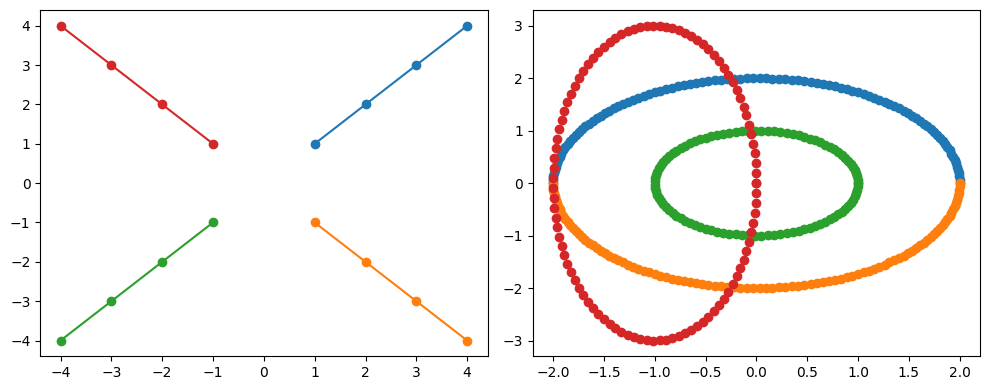

In [2]:
x = np.arange(1, 5, 1)
y = np.arange(-1, -5, -1)
vec1 = np.stack([np.vstack((x, x)), np.vstack((x, y)), np.vstack((y, y)),
                 np.vstack((y, x))], axis=1).T

fig, axes = plt.subplots(figsize=(10, 4), nrows=1, ncols=2, tight_layout=True)
for i in range(4):
    axes[0].plot(vec1[:, i, 0], vec1[:, i, 1], "o-")

z = np.linspace(0, 2*np.pi, 100)
vec2 = np.stack([np.vstack((2*np.cos(z/2), 2*np.sin(z/2))),
                 np.vstack((-2*np.cos(z/2), -2*np.sin(z/2))),
                 np.vstack((np.cos(z), np.sin(z))),
                 np.vstack((1*np.cos(z)-1, 3*np.sin(z)))], axis=1).T

for i in range(4):
    axes[1].plot(vec2[:, i, 0], vec2[:, i, 1], "o")

print(vec1)

The first example array consists of four steps (e.g. four diagonalizations of the Hamiltonian). Each step yields a total of four quantities, each described by two values. The visualization of the two examples allows us to trace the evolution of these quantities step by step.

To illustrate the use of the stepwise grouping algorithm, the quantities in each step of both example arrays are now randomly ordered.

[[[ 1  1]
  [ 1 -1]
  [-1  1]
  [-1 -1]]

 [[-2 -2]
  [ 2  2]
  [-2  2]
  [ 2 -2]]

 [[ 3 -3]
  [-3 -3]
  [ 3  3]
  [-3  3]]

 [[-4  4]
  [ 4  4]
  [-4 -4]
  [ 4 -4]]]


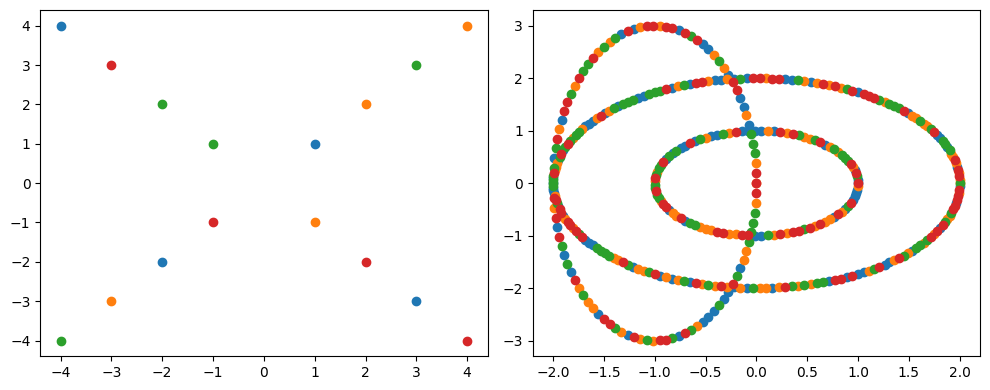

In [3]:
np.random.seed(4)
for i in range(vec1.shape[0]):
    np.random.shuffle(vec1[i])
for i in range(vec2.shape[0]):
    np.random.shuffle(vec2[i])

fig, axes = plt.subplots(figsize=(10, 4), nrows=1, ncols=2, tight_layout=True)
for i in range(4):
    axes[0].plot(vec1[:, i, 0], vec1[:, i, 1], "o")
    axes[1].plot(vec2[:, i, 0], vec2[:, i, 1], "o")

print(vec1)

The stepwise grouping algorithm can now be applied to the random ordered arrays.

[[[ 1  1]
  [ 1 -1]
  [-1  1]
  [-1 -1]]

 [[ 2  2]
  [ 2 -2]
  [-2  2]
  [-2 -2]]

 [[ 3  3]
  [ 3 -3]
  [-3  3]
  [-3 -3]]

 [[ 4  4]
  [ 4 -4]
  [-4  4]
  [-4 -4]]]


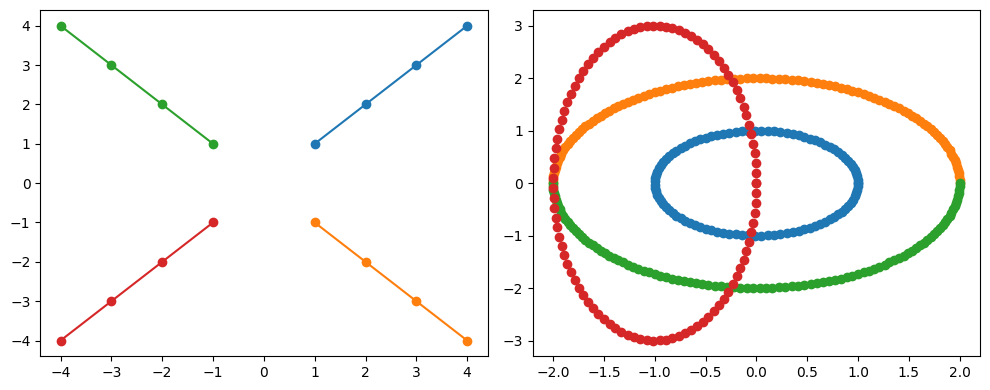

In [4]:
vec1 = sep.data.stepwise_grouping(vec1)
vec2 = sep.data.stepwise_grouping(vec2)

fig, axes = plt.subplots(figsize=(10, 4), nrows=1, ncols=2, tight_layout=True)
for i in range(4):
    axes[0].plot(vec1[:, i, 0], vec1[:, i, 1], "o-")
    axes[1].plot(vec2[:, i, 0], vec2[:, i, 1], "o")

print(vec1)

As visible, it is able to reproduce the ordered array. It is not exactly the same array but all related quantities have the same index in each step. To ensure the functionality of the algorithm, the step size should be small so that the quantities do not change too much. If the stepsize is too large, the algorithm could fail.

Cosine similarity is used as a distance metric, which is often useful if you have more than just two values describing your quantity. However, the appropriate distance metric depends on your problem. At the moment it is not possible to use any other metric.